In [73]:
import numpy as np

In [74]:
import pyed

In [75]:
%matplotlib inline

In [76]:
t = np.arange(0, 3 * np.pi, 0.2)
r = np.sin(t)
q = np.cos(1.2 * t + 1) + np.sin(t)

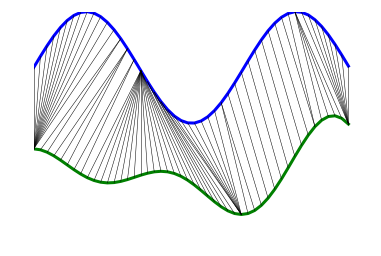

12.37014033416319

In [77]:
d = pyed.ed(r, q, pyed.Settings(dist='dtw_manhattan', step='dp2', window='nowindow', compute_path=True))
d.plot_alignment()
d.get_dist()

In [78]:
print pyed.Step().step_str('dp2')

 
  *  Step patern dp2:
  *  min(
  *      cost_matrix[i][j-1]   +   d(r[i],q[j]) 
  *      cost_matrix[i-1][j]   +   d(r[i],q[j]),
  *      cost_matrix[i-1][j-1] +   d(r[i],q[j]) 
  *      )
  


In [79]:
print pyed.Step().step_str('p05sym')


  * Sakoe-Chiba classification p = 0.5, symmetric step pattern: 
  *  min( 
  *      cost_matrix[i-1][j-3] + 2d(r[i],q[j-2]) + d(r[i],q[j-1]) + d(r[i],q[j]),
  *      cost_matrix[i-1][j-2] + 2d(r[i],q[j-1]) + d(r[i],q[j]), 
  *      cost_matrix[i-1][j-1] + 2d(r[i],q[j]), 
  *      cost_matrix[i-2][j-1] + 2d(r[i-1],q[j]) + d(r[i],q[j]), 
  *      cost_matrix[i-3][j-1] + 2d(r[i-2],q[j]) + d(r[i-1],q[j]) + d(r[i],q[j]) 
  *      )


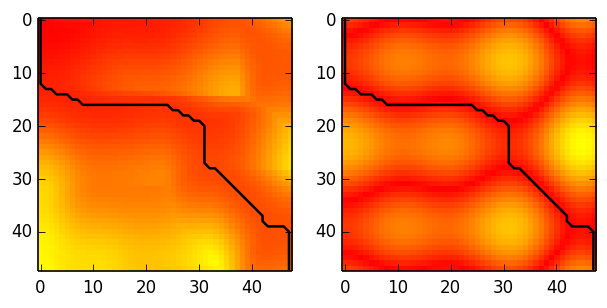

In [80]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rc("savefig", dpi=120)


def plot_cost(d):
    ils = []
    jls = []
    for i, j in d.get_path():
        ils.append(i), jls.append(j)
    fig = plt.figure()
    axl = fig.add_subplot(121)
    axr = fig.add_subplot(122)
    axl.plot(jls, ils, 'k', lw=1.5)
    axr.plot(jls, ils, 'k', lw=1.5)
    axl.imshow(d.get_cost(), interpolation='nearest', cmap=cm.autumn)  #plot global cost matrix
    dist_matrix = np.abs(r[..., np.newaxis] - q)  #local cost matrix
    axr.imshow(dist_matrix, interpolation='nearest', cmap=cm.autumn)


plot_cost(d)

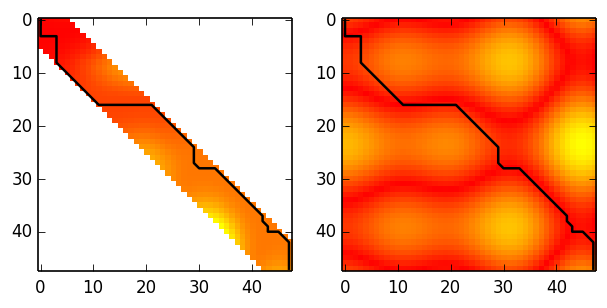

In [81]:
d = pyed.ed(r, q, pyed.Settings(dist='dtw_euclid',
                                step='dp1',
                                window='palival_mod', param=0.1,  #windows width = 0.2*reference sequence 
                                compute_path=True))
plot_cost(d)

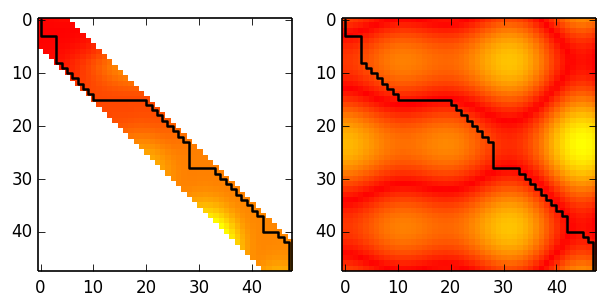

In [82]:
d = pyed.ed(r, q, pyed.Settings(dist='dtw_euclid',
                                step='dp3',
                                window='palival_mod', param=0.1,  #windows width = 0.2*reference sequence 
                                compute_path=True))
plot_cost(d)